# Aprendizaje Profundo para Procesamiento deSeñales de Imagen y Vídeo (APPIV)
## Master in Data Science / Máster en Ciencia de Datos
## Universidad Autonoma de Madrid

## **P2: multiple object tracking for video sequences (template for assignment)**

This task for the assignment "práctica 2" is to **goal is to analyze and improve the tracking performance of the baseline multi-object tracker provided in the tutorial**. Your submission consists on a report in PDF formant and this notebook (plus any additional source code files needed). You can *cut&paste as needed from the tutorial notebook* but please identify clearly your contributions with respect to the tutorial.

Your submission should adhere to the following restrictions (see the tutorial for further info on each aspect):
* The tracker must be based on the tracking-by-detection scheme, so an object detector must be applied.
* For evaluation, you must use the [MOT16](https://motchallenge.net/data/MOT16/) dataset. In particular, you must use the train/test partition provided in the [material](http://www-vpu.eps.uam.es/~jcs/APPIV/appiv_p2_material.zip) based on the original `MOT16-train`(the only one that has ground-truth available).
* The evaluation should be quantitative employing well-known metrics such as MOTA, MOTP, TP, FP, FN and IDswitches.


Author1: Name1 Surname1 (XXXX@estudiante.uam.es)

Author2: Name2 Surname2 (XXXX@estudiante.uam.es)


# 1 Setup
Add here all the required setup and libraries to run your tracker...

In [1]:
!pip uninstall -y pandas
!pip3 install pandas==1.3.3

Found existing installation: pandas 1.3.3
Uninstalling pandas-1.3.3:
  Successfully uninstalled pandas-1.3.3
Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-1.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

!pip3 install tqdm lap

# !pip3 install torch==2.1.0+cu121 torchvision==0.16.0+cu121 torchaudio===2.1.0+cu121 --extra-index-url https://download.pytorch.org/whl/cu121 #Pytorch and requirements
# #!pip3 uninstall http://www-vpu.eps.uam.es/~jcs/DLVSP/py-motmetrics-fix_pandas_deprecating_warnings.zip # #Evaluation metrics for MOT (python < 3.8)
# !pip3 install http://www-vpu.eps.uam.es/~jcs/DLVSP/py-motmetrics-fix_pandas_deprecating_warnings_python310.zip # #Evaluation metrics for MOT (python >= 3.8)

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import torch, torchvision, torchaudio
print(torch.__version__)
print(torchvision.__version__)
print(torchaudio.__version__)

2.3.0+cu121
0.18.0+cu121
2.3.0+cu121


Verificamos que estén disponibles los recursos de GPU.

In [8]:
if not torch.cuda.is_available():
    raise ValueError("No GPU resources available.")

In [ ]:
#select GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [14]:
device = torch.device('cpu')
device

device(type='cpu')

## 1.2 Connect to Google Drive

In [5]:
# # Connet to Google Drive
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

## 1.3 Download material for the assignment

In [6]:
# import os, subprocess

# # path to download in Google Drive
# download_dir = '/content/gdrive/My Drive/downloads/'

# # file with the material for the assignment
# urlfile = 'http://www-vpu.eps.uam.es/~jcs/APPSIV/appsiv_p2_material.zip'
# datafile = os.path.basename(urlfile) #with extension

# # Download material if not available in download directory
# datadownload_path = os.path.join(download_dir,datafile)
# if os.path.isfile(datadownload_path) == False:
#   !curl $urlfile --create-dirs -o "$datadownload_path"
#   print('The file \'{}\' has been downloaded to directory \'{}\''.format(datafile,download_dir))
# else:
#   print('The file \'{}\' is already available in the directory \'{}\''.format(datafile,download_dir))

## 1.4 Copy material to local directory

In [7]:
# import os, subprocess, zipfile
# from tqdm.autonotebook import tqdm

# # path to working directory (local, will be deleted when VM disconnected)
# working_dir = '/content/work/'

# # copy downloaded file to the working directory
# print('Copying file \'{}\' from \'{}\' to \'{}\'...'.format(datafile,download_dir,working_dir))
# if os.path.isfile(os.path.join(working_dir,datafile)) == False:
#   !rsync -ah --progress "$datadownload_path" "$working_dir"
# else:
#   print('already exists!')

# # uncompress/unzip file in the working directory
# print('\nUnzipping file \'{}\' in directory \'{}\'...'.format(datafile, working_dir), end='')
# if os.path.isdir(os.path.join(working_dir,'data')) == False:
#   with zipfile.ZipFile(os.path.join(working_dir,datafile)) as zf:
#     for member in tqdm(zf.infolist(), desc='Extracting '):
#         try:
#           zf.extract(member, working_dir)
#         except zipfile.error as e:
#             pass
# else:
#   print('already unzipped!')

## 1.5 Add source code location to system path

In [15]:
!pip3 install motmetrics opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [16]:
working_dir = 'work/'

In [17]:
# !pip3 uninstall -y scipy
# !pip3 install scipy==1.11.4

In [19]:
import sys,os

# add the path to the system so we can import the tracker
sys.path.append(os.path.join(working_dir,'src/'))

# test that we can successfully import the tracker
from tracker.tracker import Tracker
print('If \'from tracker.tracker import Tracker\' shows no errors, you can import and execute the sample tracker code.\n')
print('Source files of the tracker are available at the directory \'{}\':'.format(working_dir+'src/tracker/'))
!ls $working_dir/src/tracker

print('object_detector.py --> defines the object detector to be employed for tracking (FRCNN_FPN)')
print('tracker.py         --> defines the architecture for developing trackers (i.e. common functions)')
print('data_obj_detect.py --> utility for handing datasets/sequences for object detection')
print('data_track.py      --> utility for handing datasets/sequences for object tracking')
print('utils.py           --> Utilities for evaluation and plotting')

If 'from tracker.tracker import Tracker' shows no errors, you can import and execute the sample tracker code.

Source files of the tracker are available at the directory 'work/src/tracker/':
__init__.py	    object_detector_v2.py
__pycache__	    object_detector_v2.py:Zone.Identifier
data_obj_detect.py  tracker.py
data_track.py	    utils.py
object_detector.py
object_detector.py --> defines the object detector to be employed for tracking (FRCNN_FPN)
tracker.py         --> defines the architecture for developing trackers (i.e. common functions)
data_obj_detect.py --> utility for handing datasets/sequences for object detection
data_track.py      --> utility for handing datasets/sequences for object tracking
utils.py           --> Utilities for evaluation and plotting


# 2 Dataset

Add here all the required code to load the dataset...


## 2.1 Train/test split

In [20]:
#list the contents of the 'train' directory
train_dir = os.path.join(working_dir,'data/MOT16/train')
print('Train directory:')
!ls $train_dir

#list the contents of the 'test' directory
test_dir = os.path.join(working_dir,'data/MOT16/test')
print('Test directory:')
!ls $test_dir

Train directory:
MOT16-02  MOT16-04  MOT16-05  MOT16-09
Test directory:
MOT16-10  MOT16-11  MOT16-13


## 2.2 Visualization


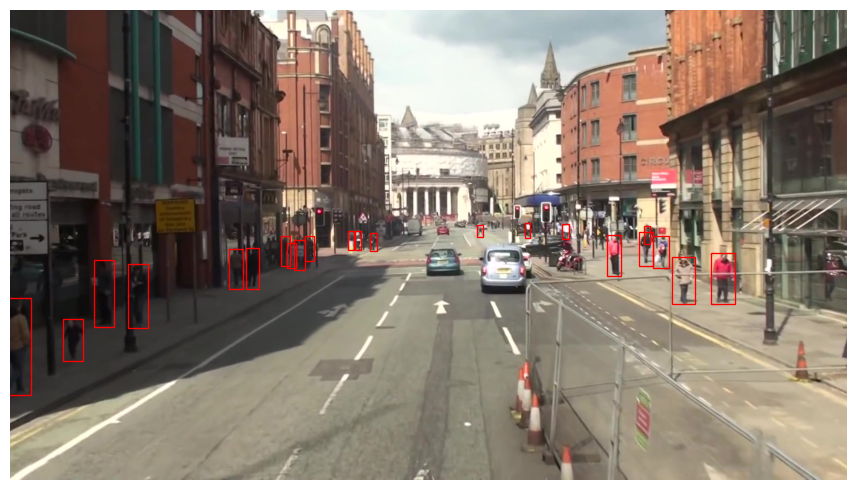

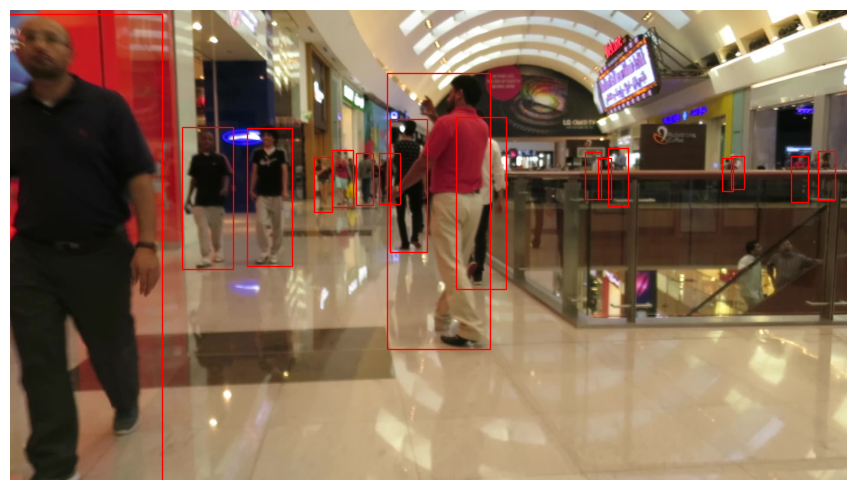

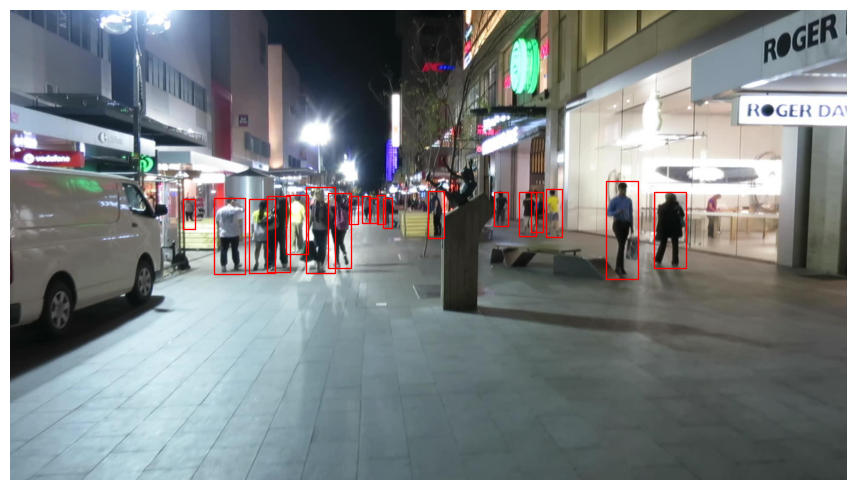

In [21]:
import matplotlib.pyplot as plt
from tracker.data_track import MOT16Sequences

seq_name = 'MOT16-02'
#seq_name = 'MOT16-train'
seq_name = 'MOT16-test'
data_dir = os.path.join(working_dir,'data/MOT16')
sequences = MOT16Sequences(seq_name, data_dir, load_seg=True)

for seq in sequences:
    for i, frame in enumerate(seq):
        img = frame['img']

        dpi = 96
        fig, ax = plt.subplots(1, dpi=dpi)

        img = img.mul(255).permute(1, 2, 0).byte().numpy()
        width, height, _ = img.shape

        ax.imshow(img, cmap='gray')
        fig.set_size_inches(width / dpi, height / dpi)

        if 'gt' in frame:
            gt = frame['gt']
            for gt_id, box in gt.items():
                rect = plt.Rectangle(
                  (box[0], box[1]), box[2] - box[0],box[3] - box[1],
                  fill=False,
                  edgecolor="red",
                  linewidth=1.0)
                ax.add_patch(rect)

        plt.axis('off')
        plt.show()

        break #we only plot the first image for each sequence

# 3 Object detector
Add here all the required code to load the detector employed by the tracker...


## 3.1 Model


In [22]:
# path for the source code of the tracker
model_dir=working_dir+'models/'

print('Model files of the tracker are available at the directory \'{}\':'.format(model_dir))
!ls "$model_dir"

Model files of the tracker are available at the directory 'work/models/':
faster_rcnn_fpn.model


## 3.2 Configuration

In [23]:
import torch

#location of the model file
obj_detect_model_file = os.path.join(working_dir, "models/faster_rcnn_fpn.model")

#threshold for non maximum suppression
obj_detect_nms_thresh = 0.3
obj_detect_score_thresh = 0.7

#detector has been trained for two classes
num_classes=2 # 1 class (person) + background (see https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html)

## 3.3 Creation of the object detector

In [24]:
from tracker.object_detector import FRCNN_FPN

# object detector
obj_detect = FRCNN_FPN(num_classes=num_classes, nms_thresh=obj_detect_nms_thresh)
obj_detect_state_dict = torch.load(obj_detect_model_file,map_location=lambda storage, loc: storage)
obj_detect.load_state_dict(obj_detect_state_dict)

# prints the architecture and sets the model to evaluation mode.
obj_detect.eval()

# loads detector to CPU or GPU (if available)
obj_detect.to(device)

/home/fernando/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'backbone_name' and 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/fernando/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


FRCNN_FPN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu)

## 3.4 Evaluate the object detector

In [25]:
# !pip3 uninstall -y numpy tqdm lap pandas
# !pip3 install numpy==1.25.2 tqdm==4.66.4 lap==0.4.0 pandas==2.2.2

In [26]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Traceback (most recent call last):
  File "/usr/bin/jupyter-nbextension", line 33, in <module>
    sys.exit(load_entry_point('notebook==6.4.8', 'console_scripts', 'jupyter-nbextension')())
  File "/usr/lib/python3/dist-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/notebook/nbextensions.py", line 980, in start
    super().start()
  File "/usr/lib/python3/dist-packages/jupyter_core/application.py", line 253, in start
    self.subapp.start()
  File "/usr/lib/python3/dist-packages/notebook/nbextensions.py", line 888, in start
    self.toggle_nbextension_python(self.extra_args[0])
  File "/usr/lib/python3/dist-packages/notebook/nbextensions.py", line 861, in toggle_nbextension_python
  

In [27]:
%%time

from tracker.data_obj_detect import MOT16ObjDetect
from tracker.utils import (evaluate_obj_detect, obj_detect_transforms)

#load train set for the MOT16 data (images and ground-truth bounding boxes)
dataset_test = MOT16ObjDetect(os.path.join(working_dir, 'data/MOT16/train'), obj_detect_transforms(train=False))

def collate_fn(batch):
    return tuple(zip(*batch))
data_loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=1, shuffle=False, num_workers=2,collate_fn=collate_fn)

#evaluation
evaluate_obj_detect(obj_detect, data_loader_test)

  0%|▎                                                                              | 13/3012 [00:17<1:08:05,  1.36s/it]


KeyboardInterrupt: 

# 4 Multi-object tracking
Add here all the required code to load and run your tracker...

## 4.1 Configuration

In [21]:
import torch
from tracker.object_detector import FRCNN_FPN

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# object detector
obj_detect = FRCNN_FPN(num_classes=num_classes, nms_thresh=obj_detect_nms_thresh)
obj_detect_state_dict = torch.load(obj_detect_model_file,map_location=lambda storage, loc: storage)
obj_detect.load_state_dict(obj_detect_state_dict)
obj_detect.eval()     # set to evaluation mode
obj_detect.to(device) # load detector to GPU or CPU

# select dataset
seq_name = 'MOT16-test' #'MOT16-train', 'MOT16-02'
data_dir = os.path.join(working_dir, 'data/MOT16')
sequences = MOT16Sequences(seq_name, data_dir)
print('Loaded {:d} sequences for {:s}'.format(len(sequences),seq_name))

#output directory
output_dir = os.path.join(working_dir, 'output')

/home/fernando/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'backbone_name' and 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/fernando/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Loaded 3 sequences for MOT16-test


In [22]:
import torch
import numpy as np

seed = 12345 #seed to allow repeatable results
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True

## 4.2 Extend the baseline tracker


In [23]:
import numpy as np
import motmetrics as mm
mm.lap.default_solver = 'lap'
from tracker.tracker import Tracker

# extended class 'Tracker' based on IoU criterion
class TrackerIoUAssignment(Tracker):

    def data_association(self, boxes, scores):
        if self.tracks:
            track_ids = [t.id for t in self.tracks]
            track_boxes = np.stack([t.box.numpy() for t in self.tracks], axis=0)

            # compute distance based on IoU (distance=1-IoU)
            distance = mm.distances.iou_matrix(track_boxes, boxes.numpy(), max_iou=0.5)

            # update existing tracks
            remove_track_ids = []
            for t, dist in zip(self.tracks, distance):
                if np.isnan(dist).all():
                    remove_track_ids.append(t.id)
                else:
                    match_id = np.nanargmin(dist)
                    t.box = boxes[match_id]
            self.tracks = [t for t in self.tracks
                           if t.id not in remove_track_ids]

            # add new tracks
            new_boxes = []
            new_scores = []
            for i, dist in enumerate(np.transpose(distance)):
                if np.isnan(dist).all():
                    new_boxes.append(boxes[i])
                    new_scores.append(scores[i])
            self.add(new_boxes, new_scores)

        else:
            self.add(boxes, scores)

# create a new tracker using the 'TrackerIoUAssignment' class
tracker = TrackerIoUAssignment(obj_detect)
print('Tracker created!')

Tracker created!


## 4.3 Run tracker

In [24]:
import time
from tqdm import tqdm
from tracker.utils import get_mot_accum

time_total = 0
mot_accums = []
results_seq = {}

for seq in sequences:
    print(f"Tracking: {seq}")
    now = time.time()

    # restart tracker state for each sequence
    tracker.reset()

    #load data
    data_loader = torch.utils.data.DataLoader(seq, batch_size=1, shuffle=False)

    #run tracker
    for frame in tqdm(data_loader):
        tracker.step(frame)

    #keep results
    results = tracker.get_results()
    results_seq[str(seq)] = results

    #perform evaluation
    if seq.no_gt:
        print(f"No GT evaluation data available.")
    else:
        mot_accums.append(get_mot_accum(results, seq)) #compute and store eval metrics

    time_total += time.time() - now

    print(f"Tracks found: {len(results)}")
    print(f"Runtime for {seq}: {time.time() - now:.1f} s.")

    #save results to output directory
    seq.write_results(results, os.path.join(output_dir))

Tracking: MOT16-13


100%|█████████████████████████████████████████████████████████████████████████████████| 750/750 [01:13<00:00, 10.22it/s]


Tracks found: 111
Runtime for MOT16-13: 84.8 s.
Writing predictions to: work/output/MOT16-13.txt
Tracking: MOT16-11


100%|█████████████████████████████████████████████████████████████████████████████████| 900/900 [01:28<00:00, 10.20it/s]


Tracks found: 63
Runtime for MOT16-11: 100.3 s.
Writing predictions to: work/output/MOT16-11.txt
Tracking: MOT16-10


100%|█████████████████████████████████████████████████████████████████████████████████| 654/654 [01:04<00:00, 10.09it/s]


Tracks found: 87
Runtime for MOT16-10: 76.4 s.
Writing predictions to: work/output/MOT16-10.txt


## 4.4 Evaluate tracking results

In [25]:
from tracker.utils import evaluate_mot_accums

print(f"Runtime for all sequences: {time_total:.1f} s.")
if mot_accums:
    evaluate_mot_accums(mot_accums,
                        [str(s) for s in sequences if not s.no_gt],
                        generate_overall=True)

Runtime for all sequences: 261.5 s.
          IDF1   IDP   IDR  Rcll  Prcn  GT MT PT ML   FP    FN IDs   FM  MOTA  MOTP
MOT16-13 46.5% 64.2% 36.5% 45.1% 79.2% 110 28 34 48 1375  6393  82  124 32.6% 0.134
MOT16-11 49.0% 54.1% 44.8% 55.8% 67.5%  75 15 32 28 2542  4166  20   39 28.7% 0.080
MOT16-10 35.3% 40.6% 31.3% 42.0% 54.5%  57 13 23 21 4504  7449  69  120  6.4% 0.138
OVERALL  42.9% 51.3% 36.8% 46.9% 65.4% 242 56 89 97 8421 18008 171  283 21.6% 0.118


As a reference, the current state-of-the-art multi-object tracker [Tracktor++](https://arxiv.org/abs/1903.05625) achieves the following tracking results on the full `MOT16-train` sequences:

              IDF1   IDP   IDR  Rcll  Prcn  GT  MT  PT  ML  FP    FN IDs   FM  MOTA  MOTP
    MOT16-02 45.8% 78.3% 32.4% 41.3% 99.8%  62   9  32  21  18 10909  59   68 40.9% 0.080
    MOT16-04 71.1% 90.3% 58.6% 64.7% 99.8%  83  32  29  22  71 16785  22   29 64.5% 0.096
    MOT16-05 64.0% 86.6% 50.7% 57.5% 98.1% 133  32  65  36  75  2942  37   59 55.8% 0.144
    MOT16-09 54.6% 69.4% 45.0% 64.3% 99.1%  26  11  13   2  31  1903  22   31 63.3% 0.086
    MOT16-10 64.3% 75.7% 55.9% 72.4% 98.0%  57  28  26   3 189  3543  71  125 70.4% 0.148
    MOT16-11 63.3% 77.0% 53.7% 69.0% 98.9%  75  24  33  18  73  2924  26   26 68.0% 0.081
    MOT16-13 73.6% 85.1% 64.8% 74.2% 97.6% 110  60  39  11 213  3000  62   90 71.9% 0.132
    OVERALL  65.0% 84.0% 53.1% 62.6% 99.1% 546 196 237 113 670 42006 299  428 61.7% 0.106

Note that the `MOT16-train` set is different from the sets of this assignment:  `train` (first four sequences of `MOT16-train`) and `test` (last three sequences of `MOT16-train`).

For your final submission you should focus on improving `MOTA` for the `train` and `test` sets provided as material of this assignment.

## 4.5 Visualize tracking results


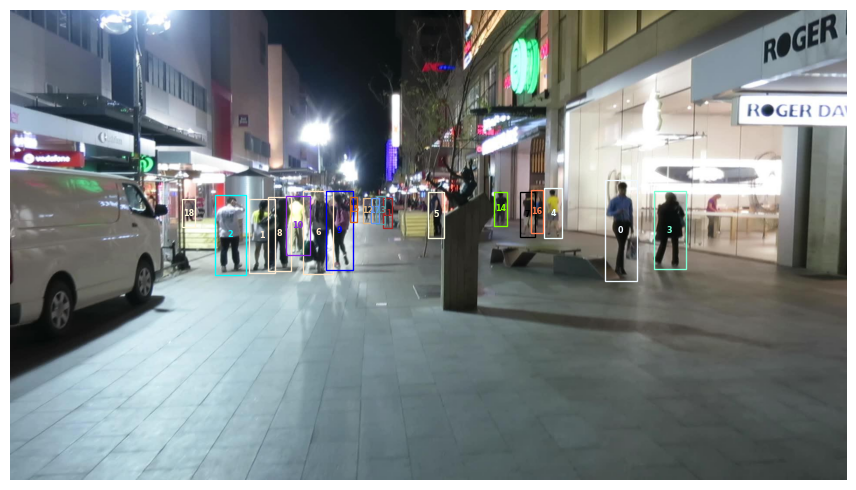

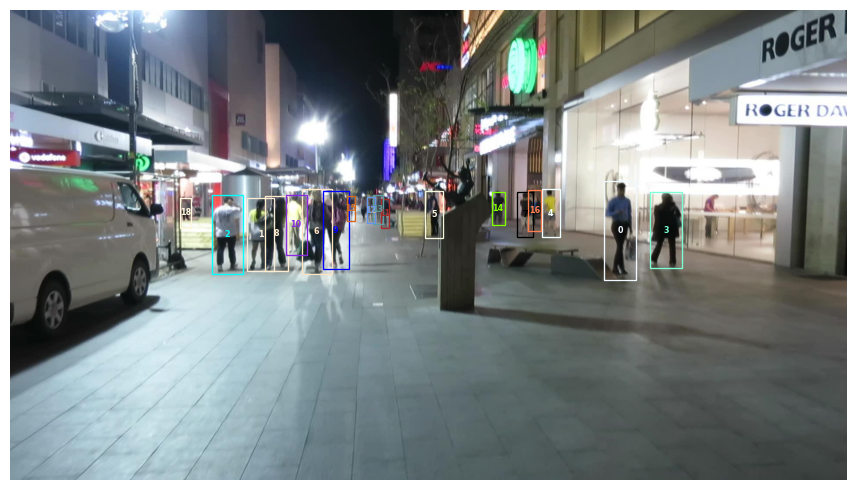

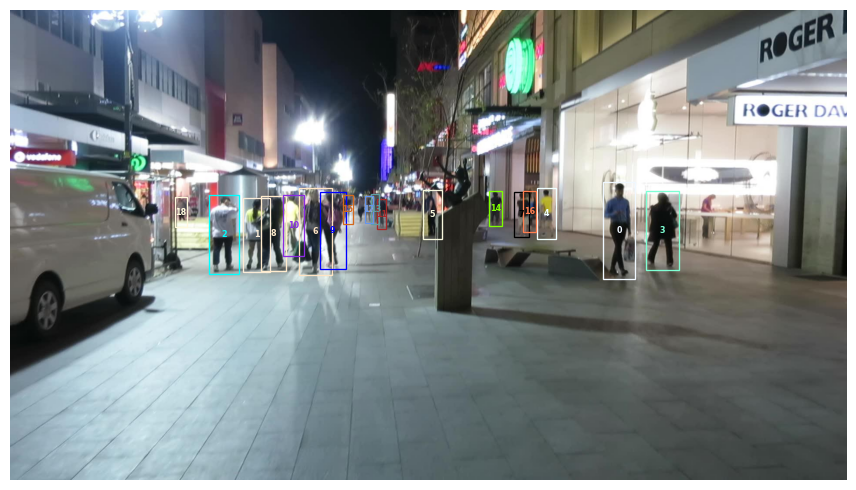

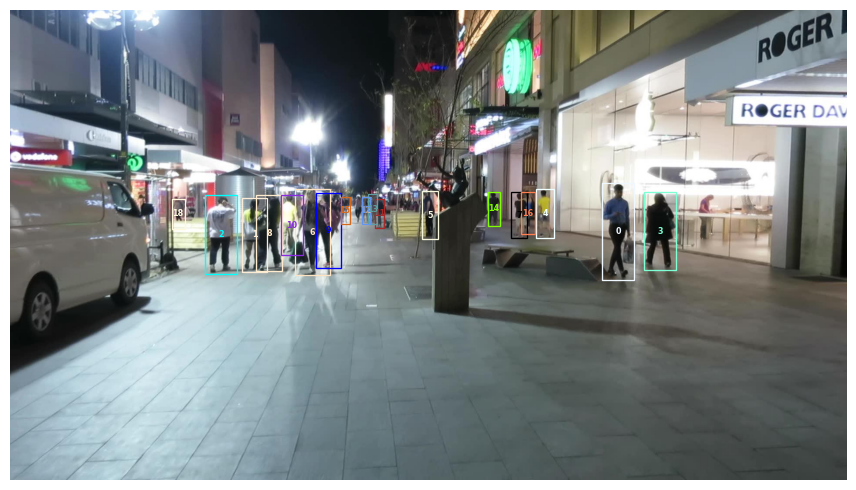

In [26]:
import matplotlib.pyplot as plt
from tracker.utils import plot_sequence

plot_sequence(results_seq['MOT16-10'],
              [s for s in sequences if str(s) == 'MOT16-10'][0],
              first_n_frames=3)

## 4.6 Copy results to Google Drive

In [27]:
# #copy output files to download directory in personal Google Drive
# !cp -r $output_dir "$download_dir"

# #show output files
# print('Output tracking results:')
# path = os.path.join(download_dir,"output")
# !ls "$path"


# 5. Extend the baseline object detector

Vamos a extender el detector de objetos considerando únicamente detecciones de alta calidad.

In [28]:
from torchvision.models.detection import FasterRCNN
help(FasterRCNN)

Help on class FasterRCNN in module torchvision.models.detection.faster_rcnn:

class FasterRCNN(torchvision.models.detection.generalized_rcnn.GeneralizedRCNN)
 |  FasterRCNN(backbone, num_classes=None, min_size=800, max_size=1333, image_mean=None, image_std=None, rpn_anchor_generator=None, rpn_head=None, rpn_pre_nms_top_n_train=2000, rpn_pre_nms_top_n_test=1000, rpn_post_nms_top_n_train=2000, rpn_post_nms_top_n_test=1000, rpn_nms_thresh=0.7, rpn_fg_iou_thresh=0.7, rpn_bg_iou_thresh=0.3, rpn_batch_size_per_image=256, rpn_positive_fraction=0.5, rpn_score_thresh=0.0, box_roi_pool=None, box_head=None, box_predictor=None, box_score_thresh=0.05, box_nms_thresh=0.5, box_detections_per_img=100, box_fg_iou_thresh=0.5, box_bg_iou_thresh=0.5, box_batch_size_per_image=512, box_positive_fraction=0.25, bbox_reg_weights=None, **kwargs)
 |  
 |  Implements Faster R-CNN.
 |  
 |  The input to the model is expected to be a list of tensors, each of shape [C, H, W], one for each
 |  image, and should be in

In [29]:
import torch
from tracker.object_detector_v2 import FRCNN_FPN

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# object detector
obj_detect = FRCNN_FPN(num_classes=num_classes, nms_thresh=obj_detect_nms_thresh, score_thresh=obj_detect_score_thresh)
obj_detect_state_dict = torch.load(obj_detect_model_file,map_location=lambda storage, loc: storage)
obj_detect.load_state_dict(obj_detect_state_dict)
obj_detect.eval()     # set to evaluation mode
obj_detect.to(device) # load detector to GPU or CPU

# select dataset
seq_name = 'MOT16-test' #'MOT16-train', 'MOT16-02'
data_dir = os.path.join(working_dir, 'data/MOT16')
sequences = MOT16Sequences(seq_name, data_dir)
print('Loaded {:d} sequences for {:s}'.format(len(sequences),seq_name))

#output directory
output_dir = os.path.join(working_dir, 'output')

/home/fernando/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'backbone_name' and 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/fernando/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Loaded 3 sequences for MOT16-test


# 6. Extend the baseline object tracker

Vamos a aplicar el algoritmo húngaro.

In [30]:
import numpy as np
import motmetrics as mm
mm.lap.default_solver = 'lap'
from tracker.tracker import Tracker
from scipy.optimize import linear_sum_assignment

# extended class 'Tracker' based on IoU criterion
class TrackerIoUAssignment_hungarian(Tracker):

    def data_association(self, boxes, scores):
        if self.tracks:
            track_ids = [t.id for t in self.tracks]
            track_boxes = np.stack([t.box.numpy() for t in self.tracks], axis=0)

            # compute distance based on IoU (distance=1-IoU)
            distance = 1-mm.distances.iou_matrix(track_boxes, boxes.numpy(), max_iou=0.5)
            distance[np.isnan(distance)] = 0

            # Solve data association using linear_sum_assignment
            row_indices, col_indices = linear_sum_assignment(distance,maximize=True)

            # Remove unmatched and assign the trackers with their objects
            remove_track_ids = []
            for i,t in enumerate(self.tracks):
                if i in row_indices:
                    match_id = col_indices[np.where(row_indices == i)[0][0]]
                    t.box = boxes[match_id]
                else:
                    remove_track_ids.append(t.id)

            self.tracks = [t for t in self.tracks
                           if t.id not in remove_track_ids]

            # add new tracks
            new_boxes = []
            new_scores = []
            for i in range(len(boxes)):
                if i not in col_indices:
                    new_boxes.append(boxes[i])
                    new_scores.append(scores[i])
            self.add(new_boxes, new_scores)

        else:
            self.add(boxes, scores)

# create a new tracker using the 'TrackerIoUAssignment' class
tracker = TrackerIoUAssignment_hungarian(obj_detect)
print('Tracker created!')

Tracker created!


In [31]:
import time
from tqdm import tqdm
from tracker.utils import get_mot_accum

time_total = 0
mot_accums = []
results_seq = {}

for seq in sequences:
    print(f"Tracking: {seq}")
    now = time.time()

    # restart tracker state for each sequence
    tracker.reset()

    #load data
    data_loader = torch.utils.data.DataLoader(seq, batch_size=1, shuffle=False)

    #run tracker
    for frame in tqdm(data_loader):
        tracker.step(frame)

    #keep results
    results = tracker.get_results()
    results_seq[str(seq)] = results

    #perform evaluation
    if seq.no_gt:
        print(f"No GT evaluation data available.")
    else:
        mot_accums.append(get_mot_accum(results, seq)) #compute and store eval metrics

    time_total += time.time() - now

    print(f"Tracks found: {len(results)}")
    print(f"Runtime for {seq}: {time.time() - now:.1f} s.")

    #save results to output directory
    seq.write_results(results, os.path.join(output_dir))

Tracking: MOT16-13


100%|█████████████████████████████████████████████████████████████████████████████████| 750/750 [01:14<00:00, 10.03it/s]


Tracks found: 195
Runtime for MOT16-13: 88.1 s.
Writing predictions to: work/output/MOT16-13.txt
Tracking: MOT16-11


100%|█████████████████████████████████████████████████████████████████████████████████| 900/900 [01:28<00:00, 10.18it/s]


Tracks found: 118
Runtime for MOT16-11: 101.9 s.
Writing predictions to: work/output/MOT16-11.txt
Tracking: MOT16-10


100%|█████████████████████████████████████████████████████████████████████████████████| 654/654 [01:05<00:00,  9.99it/s]


Tracks found: 170
Runtime for MOT16-10: 76.6 s.
Writing predictions to: work/output/MOT16-10.txt


In [32]:
from tracker.utils import evaluate_mot_accums

print(f"Runtime for all sequences: {time_total:.1f} s.")
if mot_accums:
    evaluate_mot_accums(mot_accums,
                        [str(s) for s in sequences if not s.no_gt],
                        generate_overall=True)

Runtime for all sequences: 266.6 s.
          IDF1   IDP   IDR  Rcll  Prcn  GT  MT PT ML  FP   FN IDs   FM  MOTA  MOTP
MOT16-13 66.2% 72.5% 60.9% 82.4% 98.0% 110  79 23  8 194 2051 237  190 78.7% 0.131
MOT16-11 61.0% 69.6% 54.3% 77.6% 99.3%  75  37 30  8  51 2117  64   73 76.3% 0.078
MOT16-10 52.0% 58.9% 46.5% 77.2% 97.8%  57  34 22  1 228 2926 223  265 73.7% 0.144
OVERALL  59.4% 66.7% 53.6% 79.1% 98.3% 242 150 75 17 473 7094 524  528 76.1% 0.121


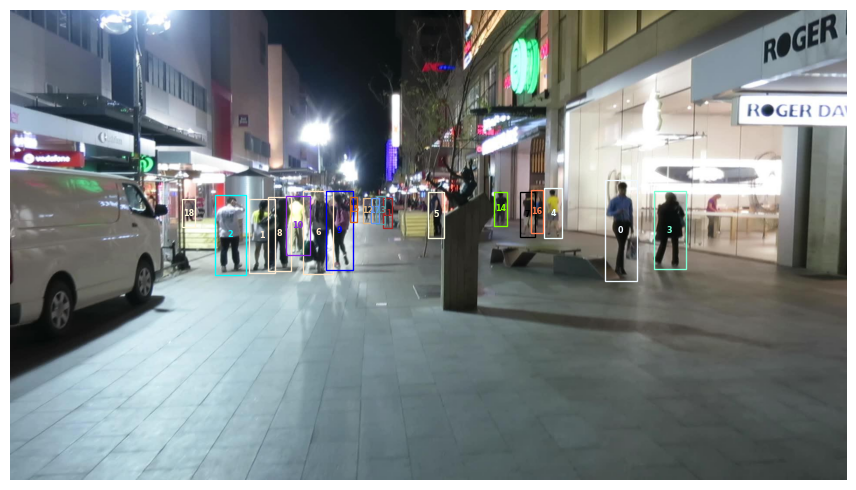

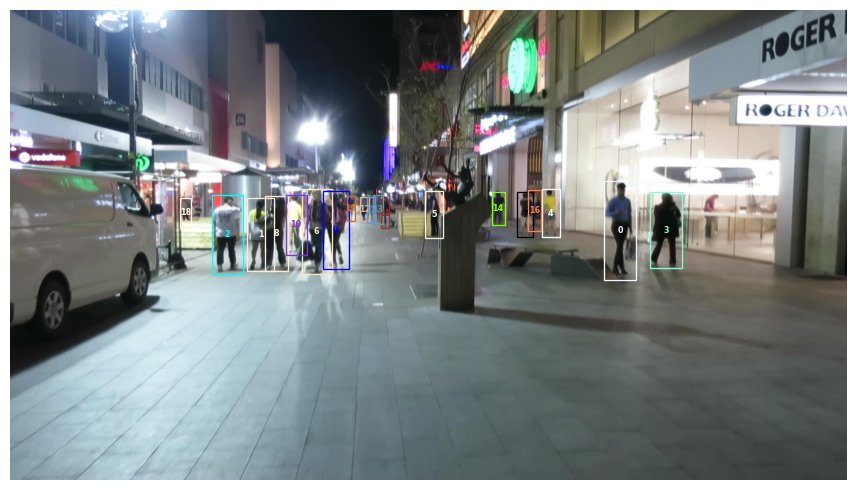

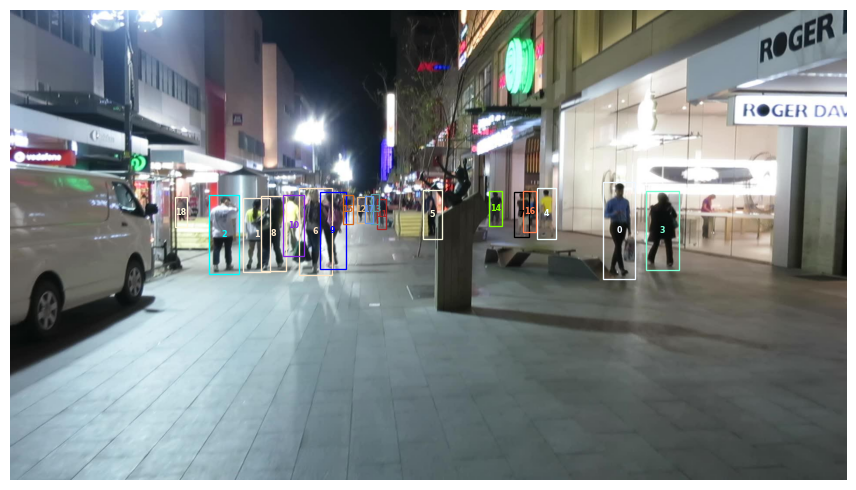

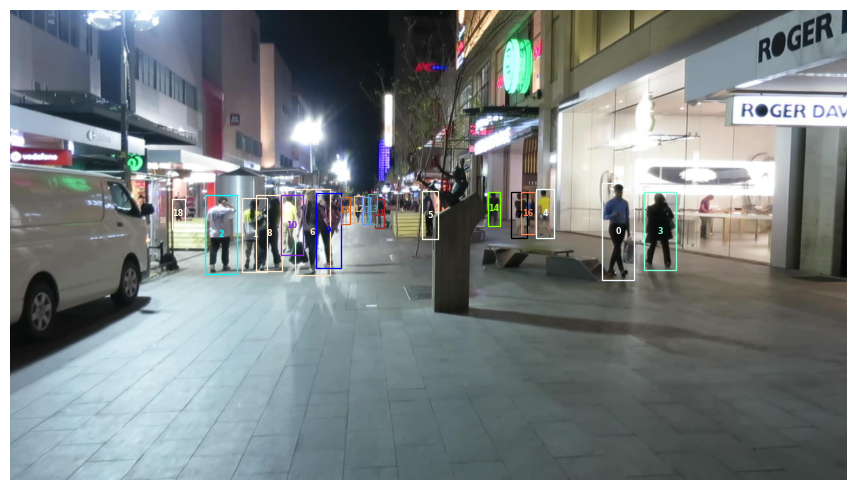

In [33]:
import matplotlib.pyplot as plt
from tracker.utils import plot_sequence

plot_sequence(results_seq['MOT16-10'],
              [s for s in sequences if str(s) == 'MOT16-10'][0],
              first_n_frames=3)